# Travelling Salesman Problem (TSP) Solutions
Student Name: Akimuddin Shaikh

Student ID: x22123245

Objective: To Implement and compare Integer Programming (IP), Genetic Algorithm (GA), and Simulated Annealing (SA) solutions for the TSP.


# Code provided by Professor

In [1]:
#IMPORTING THE NECESSARY LIBRARIES

import matplotlib.pyplot as plt
from PIL import Image
import math
import random
import numpy as np
import pulp

# 1 Problem Generator

In [2]:
# Distance function
def dist(P1, P2):
    x1, y1 = P1
    x2, y2 = P2
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

# Generate random points


In [3]:
def generatePoints(n, mindist=100):
    P = []
    eps = 0.05
    while len(P)<n:
        i=len(P)
    
        phi=random.random()*2*math.pi
        r=random.random()*1000
        p0 = (1200+round(math.cos(phi)*r,1), 1200+round(math.sin(phi)*r,1))
        
        for p in P:
            if dist(p, p0) < mindist:
                break
        else:
            P.append(p0)
    return P

# 2 Visualisation Routine



In [4]:
# Plotting the roundtrip
def plotRoundtrip(trip=[], Cities=None, title=""):
    plt.figure(figsize=(4, 4))
    plt.xlim(-300, 2400)
    plt.ylim(200, 2500)
    plt.axis('off')
    img_path = 'D:/SEM2_project/MSO/MSO REPEAT/Bavaria.png'
    if Cities is None:
        if len(trip) > 0:
            print("Roundtrip of 29 Cities in Bavaria ({title})")
            Cities = Coordinates
            img = np.asarray(Image.open(img_path))
            plt.imshow(img, origin='upper', extent=(-250, 2280, 400, 2480))
        else:
            sum_dist = sum(dist(Cities[trip[i]], Cities[trip[i+1]]) for i in range(len(trip) - 1)) + dist(Cities[trip[-1]], Cities[trip[0]])
            print(f"Generic Roundtrip of {len(Cities)} Cities  ({title}):(length={sum_dist:.2f}km)")
    else:
        sum_dist = sum(dist(Cities[trip[i]], Cities[trip[i+1]]) for i in range(len(trip) - 1)) + dist(Cities[trip[-1]], Cities[trip[0]])
        print(f"Generic Roundtrip of {len(Cities)} Cities  ({title}): (length={sum_dist:.2f}km)")
    
    # Plotting the connections between the cities
    for k in range(len(trip) - 1):
        x1, y1 = Cities[trip[k]]
        x2, y2 = Cities[trip[k+1]]
        plt.plot([x1, x2], [y1, y2], '-ro')
    
    # to complete the tour by connecting the last cities to the first cities
    if len(trip) > 0:
        x1, y1 = Cities[trip[-1]]
        x2, y2 = Cities[trip[0]]
        plt.plot([x1, x2], [y1, y2], '-ro')
    plt.title(title)
    plt.show()


# 3 TSP Solver using Integer Programming



In [5]:


# TSP Solver using Integer Programming
def TSP(Cities=None):
    def roundtrips(x):
        def isElem(x, l):
            return any(elem == x for elem in l)
        def startpoint(trips):
            for i in range(n):
                if not any(isElem(i, t) for t in trips):
                    return i
        def totalLength(trips):
            return sum(len(trip) - 1 for trip in trips)
        trips = []
        while totalLength(trips) < n:
            start = startpoint(trips)
            trip = [start]
            i = start
            while len(trip) < n - totalLength(trips):
                for j in range(n):
                    if pulp.value(x[i][j]) == 1:
                        trip.append(j)
                        i = j
                        break
                if pulp.value(x[trip[-1]][start]) == 1:
                    trip.append(start)
                    break
            trips.append(trip)
        return sorted(trips, key=len, reverse=True)

    if Cities is None:
        Cities = Coordinates
    n = len(Cities)
    def D(p, q):
        return 0 if p == q else dist(Cities[p], Cities[q])
    x = pulp.LpVariable.dicts("x", (range(n), range(n)), lowBound=0, upBound=1, cat=pulp.LpInteger)
    prob = pulp.LpProblem("TSP", pulp.LpMinimize)
    prob += pulp.lpSum(D(i, j) * x[i][j] for i in range(n) for j in range(n))
    for j in range(n):
        prob += pulp.lpSum(x[i][j] for i in range(n) if i != j) == 1
    for i in range(n):
        prob += pulp.lpSum(x[i][j] for j in range(n) if i != j) == 1
    for i in range(n):
        for j in range(n):
            prob += x[i][j] + x[j][i] <= 1
    solver = pulp.getSolver(pulp.listSolvers(onlyAvailable=True)[0], msg=0)
    prob.solve(solver)
    trips = roundtrips(x)
    while len(trips) > 1:
        for t in trips:
            prob += pulp.lpSum(x[t[i]][t[i+1]] + x[t[i+1]][t[i]] for i in range(len(t) - 1)) <= len(t) - 2
        prob.solve(solver)
        trips = roundtrips(x)
    return trips[0]

# 4 The bayg29 Reference Problem

In [6]:
# Provided data
Coordinates = [(1150.0, 1760.0), (630.0, 1660.0), (40.0, 2090.0), (750.0, 1100.0),
               (750.0, 2030.0), (1030.0, 2070.0), (1650.0, 650.0), (1490.0, 1630.0),
               (790.0, 2260.0), (710.0, 1310.0), (840.0, 550.0), (1170.0, 2300.0),
               (970.0, 1340.0), (510.0, 700.0), (750.0, 900.0), (1280.0, 1200.0),
               (230.0, 590.0), (460.0, 860.0), (1040.0, 950.0), (590.0, 1390.0),
               (830.0, 1770.0), (490.0, 500.0), (1840.0, 1240.0), (1260.0, 1500.0),
               (1280.0, 790.0), (490.0, 2130.0), (1460.0, 1420.0), (1260.0, 1910.0),
               (360.0, 1980.0)]

In [7]:
len(Coordinates)

29

In [8]:
Distances = [
    [97, 205, 139, 86, 60, 220, 65, 111, 115, 227, 95, 82, 225, 168, 103, 266, 205, 149, 120, 58, 257, 152, 52, 180, 136, 82, 34, 145],
    [129, 103, 71, 105, 258, 154, 112, 65, 204, 150, 87, 176, 137, 142, 204, 148, 148, 49, 41, 211, 226, 116, 197, 89, 153, 124, 74],
    [219, 125, 175, 386, 269, 134, 184, 313, 201, 215, 267, 248, 271, 274, 236, 272, 160, 151, 300, 350, 239, 322, 78, 276, 220, 60],
    [167, 182, 180, 162, 208, 39, 102, 227, 60, 86, 34, 96, 129, 69, 58, 60, 120, 119, 192, 114, 110, 192, 136, 173, 173],
    [51, 296, 150, 42, 131, 268, 88, 131, 245, 201, 175, 275, 218, 202, 119, 50, 281, 238, 131, 244, 51, 166, 95, 69],
    [279, 114, 56, 150, 278, 46, 133, 266, 214, 162, 302, 242, 203, 146, 67, 300, 205, 111, 238, 98, 139, 52, 120],
    [178, 328, 206, 147, 308, 172, 203, 165, 121, 251, 216, 122, 231, 249, 209, 111, 169, 72, 338, 144, 237, 331],
    [169, 151, 227, 133, 104, 242, 182, 84, 290, 230, 146, 165, 121, 270, 91, 48, 158, 200, 39, 64, 210],
    [172, 309, 68, 169, 286, 242, 208, 315, 259, 240, 160, 90, 322, 260, 160, 281, 57, 192, 107, 90],
    [140, 195, 51, 117, 72, 104, 153, 93, 88, 25, 85, 152, 200, 104, 139, 154, 134, 149, 135],
    [320, 146, 64, 68, 143, 106, 88, 81, 159, 219, 63, 216, 187, 88, 293, 191, 258, 272],
    [174, 311, 258, 196, 347, 288, 243, 192, 113, 345, 222, 144, 274, 124, 165, 71, 153],
    [144, 86, 57, 189, 128, 71, 71, 82, 176, 150, 56, 114, 168, 83, 115, 160],
    [61, 165, 51, 32, 105, 127, 201, 36, 254, 196, 136, 260, 212, 258, 234],
    [106, 110, 56, 49, 91, 153, 91, 197, 136, 94, 225, 151, 201, 205],
    [215, 159, 64, 126, 128, 190, 98, 53, 78, 218, 48, 127, 214],
    [61, 155, 157, 235, 47, 305, 243, 186, 282, 261, 300, 252],
    [105, 100, 176, 66, 253, 183, 146, 231, 203, 239, 204],
    [113, 152, 127, 150, 106, 52, 235, 112, 179, 221],
    [79, 163, 220, 119, 164, 135, 152, 153, 114],
    [236, 201, 90, 195, 90, 127, 84, 91],
    [273, 226, 148, 296, 238, 291, 269],
    [112, 130, 286, 74, 155, 291],
    [130, 178, 38, 75, 180],
    [281, 120, 205, 270],
    [213, 145, 36],
    [94, 217],
    [162]
]


In [9]:
len(Distances)

28

In [10]:
# Define the distance function
def D(p, q):
    return 0 if p == q else Distances[min(p, q)][max(p, q) - min(p, q) - 1]

# 5 Some Generic Sample Problems

Trip: [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23, 0]
Roundtrip of 29 Cities in Bavaria ({title})


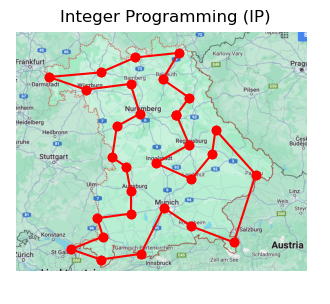

In [11]:
# Set the seed value to ensure the results are reproducible
random.seed(3245)

# Plot the provided roundtrip solution
trip = TSP()
print(f"Trip: {trip}")
plotRoundtrip(trip=trip, title="Integer Programming (IP)")

Generic Roundtrip of 29 Cities  ((IP for 29 cities) ): (length=9074.15km)


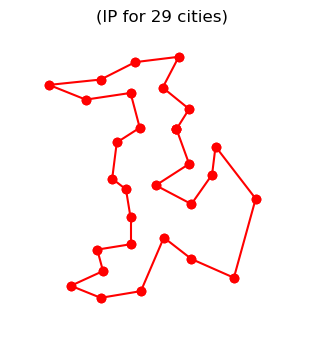

In [12]:
# plot the roundtrip for 29 cities by IP
random.seed(3245)
plotRoundtrip(trip=TSP(), Cities=Coordinates, title="(IP for 29 cities) ")

Trip for 40 cities: [0, 9, 17, 31, 2, 34, 7, 16, 12, 14, 1, 13, 29, 3, 26, 27, 30, 6, 10, 25, 20, 4, 33, 11, 36, 28, 32, 5, 15, 18, 21, 19, 37, 8, 39, 24, 22, 23, 38, 35, 0]
Generic Roundtrip of 40 Cities  (IP for 40 cities): (length=9457.43km)


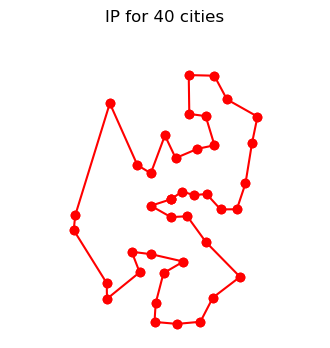

In [13]:

# Example usage of 40 generatePoints and plotRoundtrip for generic problems
random.seed(3245)
C40 = generatePoints(40)
trip_40 = TSP(C40)
print(f"Trip for 40 cities: {trip_40}")
plotRoundtrip(Cities=C40, trip=trip_40, title="IP for 40 cities")

Trip for 80 cities: [0, 38, 23, 43, 15, 60, 18, 5, 32, 28, 67, 11, 36, 68, 21, 19, 55, 37, 8, 69, 39, 74, 24, 48, 65, 45, 51, 54, 22, 42, 2, 34, 7, 70, 77, 56, 49, 64, 12, 61, 16, 26, 27, 66, 40, 31, 17, 9, 44, 30, 63, 10, 25, 6, 62, 57, 29, 3, 79, 14, 1, 73, 13, 76, 47, 59, 41, 20, 58, 53, 50, 71, 4, 33, 52, 75, 78, 72, 35, 46, 0]
Generic Roundtrip of 80 Cities  (IP for 80 cities): (length=13701.54km)


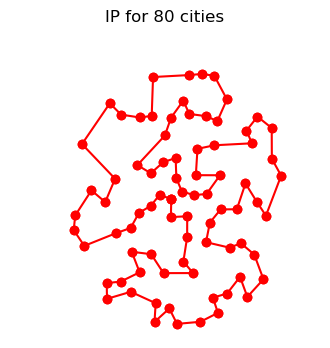

In [14]:

# Example usage of 80 generatePoints and plotRoundtrip for generic problems
random.seed(3245)
C80 = generatePoints(80)
trip_80 = TSP(C80)
print(f"Trip for 80 cities: {trip_80}")
plotRoundtrip(Cities=C80, trip=trip_80, title="IP for 80 cities")


# Implementing 2 metaheuristic algorithm
# 1. Genetic Algorithm
# 2. Simulated Annealing

# 1. Genetic Algorithm 



# Implements a Genetic Algorithm to solve the TSP by evolving routes through selection, crossover, and mutation.


Generic Roundtrip of 29 Cities  (GA for 29 cities): (length=10723.68km)


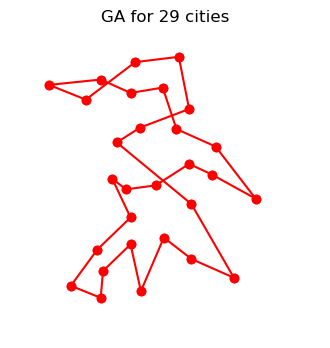

In [15]:
def genetic_algorithm(Cities, pop_size=100, generations=500, mutation_rate=0.01):
    def create_route(n):
        return random.sample(range(n), n)

    def initial_population(pop_size, n):
        return [create_route(n) for _ in range(pop_size)]

    def route_distance(route, Cities):
        return sum(dist(Cities[route[i]], Cities[route[i + 1]]) for i in range(len(route) - 1)) + dist(Cities[route[-1]], Cities[route[0]])

    def rank_routes(population, Cities):
        fitness_results = {i: route_distance(route, Cities) for i, route in enumerate(population)}
        return sorted(fitness_results.items(), key=lambda x: x[1])

    def selection(pop_ranked, elite_size):
        selection_results = [pop_ranked[i][0] for i in range(elite_size)]
        for _ in range(len(pop_ranked) - elite_size):
            pick = random.uniform(0, 1)
            for i in range(len(pop_ranked)):
                if pick <= (i + 1) / len(pop_ranked):
                    selection_results.append(pop_ranked[i][0])
                    break
        return selection_results

    def mating_pool(population, selection_results):
        return [population[i] for i in selection_results]

    def breed(parent1, parent2):
        geneA = int(random.random() * len(parent1))
        geneB = int(random.random() * len(parent1))
        start_gene, end_gene = min(geneA, geneB), max(geneA, geneB)
        childP1 = parent1[start_gene:end_gene]
        child = [item for item in parent2 if item not in childP1]
        return childP1 + child

    def breed_population(matingpool, elite_size):
        children = matingpool[:elite_size]
        length = len(matingpool) - elite_size
        pool = random.sample(matingpool, len(matingpool))
        for i in range(length):
            child = breed(pool[i], pool[len(matingpool) - i - 1])
            children.append(child)
        return children

    def mutate(individual, mutation_rate):
        for swapped in range(len(individual)):
            if random.random() < mutation_rate:
                swap_with = int(random.random() * len(individual))
                individual[swapped], individual[swap_with] = individual[swap_with], individual[swapped]
        return individual

    def mutate_population(population, mutation_rate):
        return [mutate(ind, mutation_rate) for ind in population]

    def next_generation(current_gen, elite_size, mutation_rate, Cities):
        pop_ranked = rank_routes(current_gen, Cities)
        selection_results = selection(pop_ranked, elite_size)
        matingpool = mating_pool(current_gen, selection_results)
        children = breed_population(matingpool, elite_size)
        next_gen = mutate_population(children, mutation_rate)
        return next_gen

    n = len(Cities)
    elite_size = int(0.2 * pop_size)
    population = initial_population(pop_size, n)
    for i in range(generations):
        population = next_generation(population, elite_size, mutation_rate, Cities)
    best_route_index = rank_routes(population, Cities)[0][0]
    best_route = population[best_route_index]
    return best_route

# Example usage
random.seed(3245)
best_route_ga = genetic_algorithm(Coordinates)
plotRoundtrip(trip=best_route_ga, Cities=Coordinates, title="GA for 29 cities")


Generic Roundtrip of 40 Cities  (GA for 40 cities): (length=14278.84km)


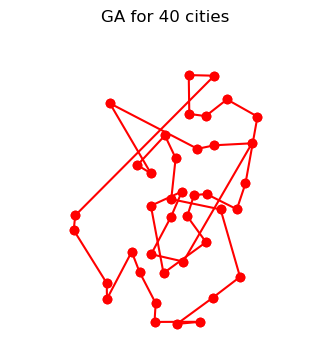

In [16]:
# Generate points and plot roundtrip for 40 cities
random.seed(3245)
C40 = generatePoints(40)
best_route_ga_40 = genetic_algorithm(C40)
plotRoundtrip(trip=best_route_ga_40, Cities=C40, title="GA for 40 cities")

Generic Roundtrip of 80 Cities  (GA for 80 cities): (length=45078.00km)


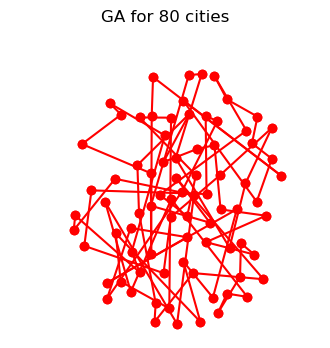

In [17]:
# Generate points and plot roundtrip for 80 cities
random.seed(3245)
C80 = generatePoints(80)
best_route_ga_80 = genetic_algorithm(C80)
plotRoundtrip(trip=best_route_ga_80, Cities=C80, title="GA for 80 cities")

# Improved Genetic Algorithm

# Implements an Advanced Genetic Algorithm for TSP using edge recombination crossover, adaptive mutation, and dynamic population evolution.


In [18]:
# Advanced Genetic Algorithm
def genetic_algorithm_advanced(Cities, pop_size=100, generations=500, initial_mutation_rate=0.01):
    def create_route(n):
        return random.sample(range(n), n)

    def initial_population(pop_size, n):
        return [create_route(n) for _ in range(pop_size)]

    def route_distance(route, Cities):
        return sum(dist(Cities[route[i]], Cities[route[i + 1]]) for i in range(len(route) - 1)) + dist(Cities[route[-1]], Cities[route[0]])

    def rank_routes(population, Cities):
        fitness_results = {i: route_distance(route, Cities) for i, route in enumerate(population)}
        return sorted(fitness_results.items(), key=lambda x: x[1])

    def selection(pop_ranked, elite_size):
        selection_results = [pop_ranked[i][0] for i in range(elite_size)]
        for _ in range(len(pop_ranked) - elite_size):
            pick = random.uniform(0, 1)
            for i in range(len(pop_ranked)):
                if pick <= (i + 1) / len(pop_ranked):
                    selection_results.append(pop_ranked[i][0])
                    break
        return selection_results

    def mating_pool(population, selection_results):
        return [population[i] for i in selection_results]

    def edge_recombination_crossover(parent1, parent2):
        neighbors = {i: set() for i in parent1}
        for parent in [parent1, parent2]:
            for i in range(len(parent)):
                left, right = parent[i-1], parent[(i+1)%len(parent)]
                neighbors[parent[i]].add(left)
                neighbors[parent[i]].add(right)

        start = random.choice(parent1)
        child = [start]
        current = start
        while len(child) < len(parent1):
            for nbrs in neighbors.values():
                nbrs.discard(current)
            next_candidates = list(neighbors[current])
            if next_candidates:
                current = min(next_candidates, key=lambda x: len(neighbors[x]))
            else:
                current = random.choice([node for node in parent1 if node not in child])
            child.append(current)
        return child

    def breed_population(matingpool, elite_size):
        children = matingpool[:elite_size]
        length = len(matingpool) - elite_size
        pool = random.sample(matingpool, len(matingpool))
        for i in range(length):
            child = edge_recombination_crossover(pool[i], pool[len(matingpool) - i - 1])
            children.append(child)
        return children

    def mutate(individual, initial_rate, generation, max_generations):
        mutation_rate = initial_rate * (1 - (generation / max_generations))  # Adaptive mutation rate
        for swapped in range(len(individual)):
            if random.random() < mutation_rate:
                swap_with = int(random.random() * len(individual))
                individual[swapped], individual[swap_with] = individual[swap_with], individual[swapped]
        return individual

    def mutate_population(population, initial_rate, generation, max_generations):
        return [mutate(ind, initial_rate, generation, max_generations) for ind in population]

    def next_generation(current_gen, elite_size, initial_rate, generation, max_generations, Cities):
        pop_ranked = rank_routes(current_gen, Cities)
        selection_results = selection(pop_ranked, elite_size)
        matingpool = mating_pool(current_gen, selection_results)
        children = breed_population(matingpool, elite_size)
        next_gen = mutate_population(children, initial_rate, generation, max_generations)
        return next_gen

    n = len(Cities)
    elite_size = int(0.2 * pop_size)
    population = initial_population(pop_size, n)
    for generation in range(generations):
        population = next_generation(population, elite_size, initial_mutation_rate, generation, generations, Cities)
    best_route_index = rank_routes(population, Cities)[0][0]
    best_route = population[best_route_index]
    return best_route


In [19]:
import time

Generic Roundtrip of 29 Cities  (GA for 29 cities): (length=9200.52km)


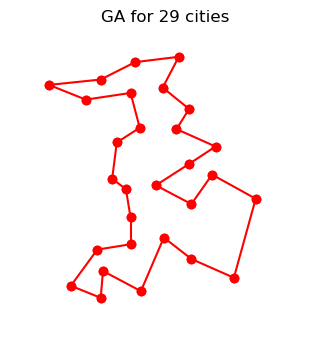

Advanced GA Roundtrip of 29 Cities (length=9200.52km)


In [20]:
# Set seed for reproducibility
random.seed(3245)

# Advanced Genetic Algorithm
start_time = time.time()
best_route_ga_adv = genetic_algorithm_advanced(Coordinates)
ga_adv_time = time.time() - start_time
ga_adv_distance = sum(dist(Coordinates[best_route_ga_adv[i]], Coordinates[best_route_ga_adv[i+1]]) for i in range(len(best_route_ga_adv) - 1)) + dist(Coordinates[best_route_ga_adv[-1]], Coordinates[best_route_ga_adv[0]])
plotRoundtrip(trip=best_route_ga_adv, Cities=Coordinates, title="GA for 29 cities")
print(f"Advanced GA Roundtrip of 29 Cities (length={ga_adv_distance:.2f}km)")

Generic Roundtrip of 40 Cities  (GA for 40 cities): (length=10775.64km)


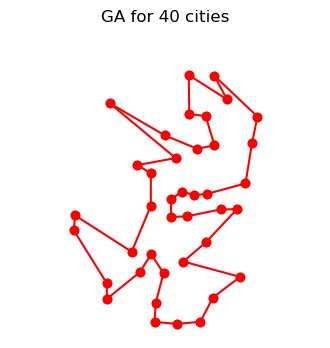

Advanced GA Roundtrip of 40 Cities (length=10775.64km)


In [21]:
# Generate points and plot roundtrip for 40 cities
random.seed(3245)
C40 = generatePoints(40)
start_time = time.time()
best_route_ga_adv_40 = genetic_algorithm_advanced(C40)
ga_adv_time_40 = time.time() - start_time
ga_adv_distance_40 = sum(dist(C40[best_route_ga_adv_40[i]], C40[best_route_ga_adv_40[i+1]]) for i in range(len(best_route_ga_adv_40) - 1)) + dist(C40[best_route_ga_adv_40[-1]], C40[best_route_ga_adv_40[0]])
plotRoundtrip(trip=best_route_ga_adv_40, Cities=C40, title="GA for 40 cities")
print(f"Advanced GA Roundtrip of 40 Cities (length={ga_adv_distance_40:.2f}km)")

Generic Roundtrip of 80 Cities  (GA for 80 cities): (length=21884.39km)


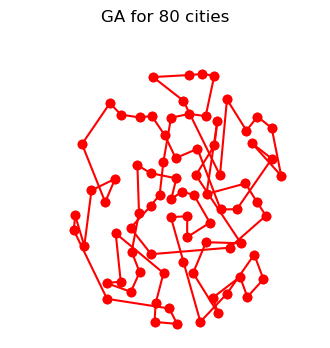

Advanced GA Roundtrip of 80 Cities (length=21884.39km)


In [22]:
# Generate points and plot roundtrip for 80 cities
random.seed(3245)
C80 = generatePoints(80)
start_time = time.time()
best_route_ga_adv_80 = genetic_algorithm_advanced(C80)
ga_adv_time_80 = time.time() - start_time
ga_adv_distance_80 = sum(dist(C80[best_route_ga_adv_80[i]], C80[best_route_ga_adv_80[i+1]]) for i in range(len(best_route_ga_adv_80) - 1)) + dist(C80[best_route_ga_adv_80[-1]], C80[best_route_ga_adv_80[0]])
plotRoundtrip(trip=best_route_ga_adv_80, Cities=C80, title="GA for 80 cities")
print(f"Advanced GA Roundtrip of 80 Cities (length={ga_adv_distance_80:.2f}km)")

# 2. Simulated Annealing

# Implements Simulated Annealing for TSP by iteratively refining routes using temperature-based probabilistic acceptance of worse solutions to avoid local minima.


Generic Roundtrip of 29 Cities  (Simulated Annealing): (length=10708.26km)


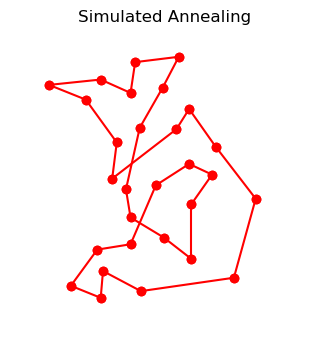

In [23]:
def simulated_annealing(Cities, initial_temp=10000, cooling_rate=0.003, initial_solution=None):
    def route_distance(route, Cities):
        return sum(dist(Cities[route[i]], Cities[route[i + 1]]) for i in range(len(route) - 1)) + dist(Cities[route[-1]], Cities[route[0]])

    def acceptance_probability(old_cost, new_cost, temperature):
        if new_cost < old_cost:
            return 1.0
        return math.exp((old_cost - new_cost) / temperature)

    def get_neighbor(route):
        new_route = route[:]
        i, j = random.sample(range(len(new_route)), 2)
        new_route[i], new_route[j] = new_route[j], new_route[i]
        return new_route

    n = len(Cities)
    current_route = random.sample(range(n), n)
    current_cost = route_distance(current_route, Cities)
    best_route = current_route[:]
    best_cost = current_cost
    temperature = initial_temp

    while temperature > 1:
        new_route = get_neighbor(current_route)
        new_cost = route_distance(new_route, Cities)
        if acceptance_probability(current_cost, new_cost, temperature) > random.random():
            current_route = new_route[:]
            current_cost = new_cost
        if new_cost < best_cost:
            best_route = new_route[:]
            best_cost = new_cost
        temperature *= 1 - cooling_rate

    return best_route


# Example usage
random.seed(3245)
best_route_sa = simulated_annealing(Coordinates)
plotRoundtrip(trip=best_route_sa, Cities=Coordinates, title="Simulated Annealing")


Generic Roundtrip of 40 Cities  (Simulated Annealing (SA) for 40 cities): (length=13266.86km)


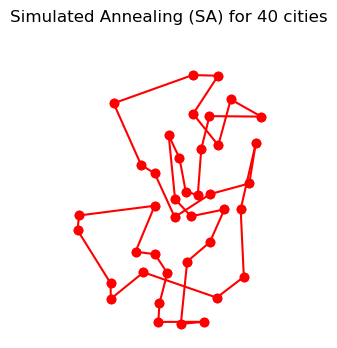

Simulated Annealing Roundtrip of 40 Cities (length=13266.86km)


In [24]:
# Example usage for 40 cities
random.seed(3245)
C40 = generatePoints(40)
best_route_sa_40 = simulated_annealing(C40)
plotRoundtrip(trip=best_route_sa_40, Cities=C40, title="Simulated Annealing (SA) for 40 cities")
sa_distance_40 = sum(dist(C40[best_route_sa_40[i]], C40[best_route_sa_40[i+1]]) for i in range(len(best_route_sa_40) - 1)) + dist(C40[best_route_sa_40[-1]], C40[best_route_sa_40[0]])
print(f"Simulated Annealing Roundtrip of 40 Cities (length={sa_distance_40:.2f}km)")


Generic Roundtrip of 80 Cities  (Simulated Annealing (SA) for 80 cities): (length=29338.96km)


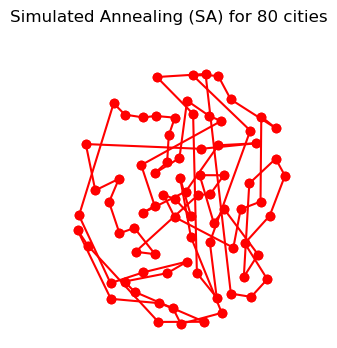

Simulated Annealing Roundtrip of 80 Cities (length=29338.96km)


In [25]:
# Example usage for 80 cities
random.seed(3245)
C80 = generatePoints(80)
best_route_sa_80 = simulated_annealing(C80)
plotRoundtrip(trip=best_route_sa_80, Cities=C80, title="Simulated Annealing (SA) for 80 cities")
sa_distance_80 = sum(dist(C80[best_route_sa_80[i]], C80[best_route_sa_80[i+1]]) for i in range(len(best_route_sa_80) - 1)) + dist(C80[best_route_sa_80[-1]], C80[best_route_sa_80[0]])
print(f"Simulated Annealing Roundtrip of 80 Cities (length={sa_distance_80:.2f}km)")

# Advanced Simulated Annealing

# Implements an Advanced Simulated Annealing algorithm for TSP with adaptive cooling, perturbation strength, and integrated 2-opt local search for improved route optimization.


In [26]:
# Improved Advanced Simulated Annealing algorithm
def advanced_simulated_annealing(Cities, initial_temp=10000, cooling_rate=0.99, perturbation_strength=0.1, max_iterations=10000):
    def route_distance(route, Cities):
        return sum(dist(Cities[route[i]], Cities[route[i + 1]]) for i in range(len(route) - 1)) + dist(Cities[route[-1]], Cities[route[0]])

    def acceptance_probability(old_cost, new_cost, temperature):
        if new_cost < old_cost:
            return 1.0
        return math.exp((old_cost - new_cost) / temperature)

    def get_neighbor(route, strength):
        new_route = route[:]
        for _ in range(int(len(new_route) * strength)):
            i, j = random.sample(range(len(new_route)), 2)
            new_route[i], new_route[j] = new_route[j], new_route[i]
        return new_route

    def two_opt(route):
        best = route
        improved = True
        while improved:
            improved = False
            for i in range(1, len(route) - 2):
                for j in range(i + 1, len(route)):
                    if j - i == 1:
                        continue
                    new_route = route[:]
                    new_route[i:j] = route[j-1:i-1:-1]
                    if route_distance(new_route, Cities) < route_distance(best, Cities):
                        best = new_route
                        improved = True
            route = best
        return best

    n = len(Cities)
    current_route = random.sample(range(n), n)
    current_cost = route_distance(current_route, Cities)
    best_route = current_route[:]
    best_cost = current_cost
    temperature = initial_temp

    for iteration in range(max_iterations):
        new_route = get_neighbor(current_route, perturbation_strength)
        new_cost = route_distance(new_route, Cities)
        if acceptance_probability(current_cost, new_cost, temperature) > random.random():
            current_route = new_route[:]
            current_cost = new_cost
        if new_cost < best_cost:
            best_route = new_route[:]
            best_cost = new_cost
        temperature *= cooling_rate

        # Apply 2-opt local search at intervals
        if iteration % 100 == 0:
            best_route = two_opt(best_route)
            best_cost = route_distance(best_route, Cities)

    return best_route


Generic Roundtrip of 29 Cities  (SA for 29 cities): (length=9905.16km)


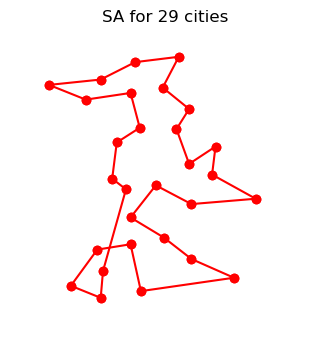

Advanced SA Roundtrip of 29 Cities (length=9905.16km)
Advanced Simulated Annealing Time: 3.57 seconds, Distance: 9905.16 km


In [27]:
# Advanced Simulated Annealing
start_time = time.time()
best_route_sa_adv = advanced_simulated_annealing(Coordinates)
sa_adv_time = time.time() - start_time
sa_adv_distance = sum(dist(Coordinates[best_route_sa_adv[i]], Coordinates[best_route_sa_adv[i+1]]) for i in range(len(best_route_sa_adv) - 1)) + dist(Coordinates[best_route_sa_adv[-1]], Coordinates[best_route_sa_adv[0]])
plotRoundtrip(trip=best_route_sa_adv, Cities=Coordinates, title="SA for 29 cities")
print(f"Advanced SA Roundtrip of 29 Cities (length={sa_adv_distance:.2f}km)")
print(f"Advanced Simulated Annealing Time: {sa_adv_time:.2f} seconds, Distance: {sa_adv_distance:.2f} km")

Generic Roundtrip of 40 Cities  (SA for 40 cities): (length=10974.92km)


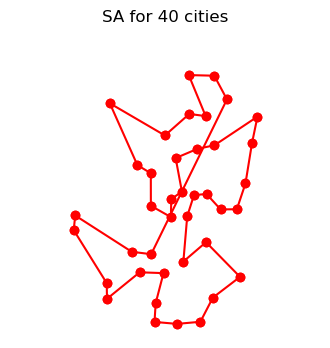

Advanced SA Roundtrip of 40 Cities (length=10974.92km)
Advanced Simulated Annealing Time for 40 cities: 9.58 seconds, Distance: 10974.92 km


In [28]:
# Run Advanced Simulated Annealing for 40 cities
random.seed(3245)
C40 = generatePoints(40)
start_time = time.time()
best_route_sa_adv_40 = advanced_simulated_annealing(C40)
sa_adv_time_40 = time.time() - start_time
sa_adv_distance_40 = sum(dist(C40[best_route_sa_adv_40[i]], C40[best_route_sa_adv_40[i+1]]) for i in range(len(best_route_sa_adv_40) - 1)) + dist(C40[best_route_sa_adv_40[-1]], C40[best_route_sa_adv_40[0]])
plotRoundtrip(trip=best_route_sa_adv_40, Cities=C40, title="SA for 40 cities")
print(f"Advanced SA Roundtrip of 40 Cities (length={sa_adv_distance_40:.2f}km)")
print(f"Advanced Simulated Annealing Time for 40 cities: {sa_adv_time_40:.2f} seconds, Distance: {sa_adv_distance_40:.2f} km")

Generic Roundtrip of 80 Cities  (SA for 80 cities): (length=15116.73km)


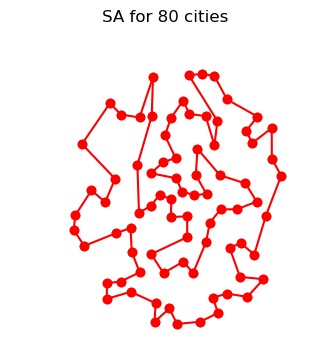

Advanced SA Roundtrip of 80 Cities (length=15116.73km)
Advanced Simulated Annealing Time for 80 cities: 90.12 seconds, Distance: 15116.73 km


In [29]:
# Run Advanced Simulated Annealing for 80 cities
random.seed(3245)
C80 = generatePoints(80)
start_time = time.time()
best_route_sa_adv_80 = advanced_simulated_annealing(C80)
sa_adv_time_80 = time.time() - start_time
sa_adv_distance_80 = sum(dist(C80[best_route_sa_adv_80[i]], C80[best_route_sa_adv_80[i+1]]) for i in range(len(best_route_sa_adv_80) - 1)) + dist(C80[best_route_sa_adv_80[-1]], C80[best_route_sa_adv_80[0]])
plotRoundtrip(trip=best_route_sa_adv_80, Cities=C80, title="SA for 80 cities")
print(f"Advanced SA Roundtrip of 80 Cities (length={sa_adv_distance_80:.2f}km)")
print(f"Advanced Simulated Annealing Time for 80 cities: {sa_adv_time_80:.2f} seconds, Distance: {sa_adv_distance_80:.2f} km")

# Performance Comparison

In [30]:
import time



# Performance comparison for roundtrip of 29 cities

In [31]:
# Compare performance
random.seed(3245)


# Integer Programming
start_time = time.time()
trip_ip = TSP()
ip_time = time.time() - start_time
ip_distance = sum(dist(Coordinates[trip_ip[i]], Coordinates[trip_ip[i+1]]) for i in range(len(trip_ip) - 1)) + dist(Coordinates[trip_ip[-1]], Coordinates[trip_ip[0]])



# Genetic Algorithm
start_time = time.time()
best_route_ga = genetic_algorithm(Coordinates)
ga_time = time.time() - start_time
ga_distance = sum(dist(Coordinates[best_route_ga[i]], Coordinates[best_route_ga[i+1]]) for i in range(len(best_route_ga) - 1)) + dist(Coordinates[best_route_ga[-1]], Coordinates[best_route_ga[0]])

# Function to run the Simulated Annealing multiple times and get the best result
def run_simulated_annealing(Cities, num_runs=10):
    best_route = None
    best_distance = float('inf')
    for _ in range(num_runs):
        random.seed(3245)  # Set seed for reproducibility
        route = simulated_annealing(Cities)
        distance = sum(dist(Cities[route[i]], Cities[route[i+1]]) for i in range(len(route) - 1)) + dist(Cities[route[-1]], Cities[route[0]])
        if distance < best_distance:
            best_route = route
            best_distance = distance
    return best_route, best_distance

# Simulated Annealing
start_time = time.time()
best_route_sa, sa_distance = run_simulated_annealing(Coordinates)  # Correctly unpack the tuple
sa_time = time.time() - start_time


print(f"Integer Programming Time for 29 cities: {ip_time:.2f} seconds, Distance: {ip_distance:.2f} km")
print(f"Genetic Algorithm Time for 29 cities: {ga_time:.2f} seconds, Distance: {ga_distance:.2f} km")
print(f"Simulated Annealing Time for 29 cities: {sa_time:.2f} seconds, Distance: {sa_distance:.2f} km")
print(f"Advanced Genetic Algorithm Time for 29 cities: {ga_adv_time:.2f} seconds, Distance: {ga_adv_distance:.2f} km")
print(f"Advanced Simulated Annealing Time for 29 cities: {sa_adv_time:.2f} seconds, Distance: {sa_adv_distance:.2f} km")


Integer Programming Time for 29 cities: 3.62 seconds, Distance: 9074.15 km
Genetic Algorithm Time for 29 cities: 2.49 seconds, Distance: 10723.68 km
Simulated Annealing Time for 29 cities: 1.09 seconds, Distance: 10708.26 km
Advanced Genetic Algorithm Time for 29 cities: 9.11 seconds, Distance: 9200.52 km
Advanced Simulated Annealing Time for 29 cities: 3.57 seconds, Distance: 9905.16 km


# Performance comparison for roundtrip of 40 cities

In [32]:
import time

# Define the distances for each algorithm for 40 cities roundtrip

# Integer Programming
random.seed(3245)
C40 = generatePoints(40)
start_time = time.time()
trip_ip_40 = TSP(C40)
ip_time_40 = time.time() - start_time
ip_distance_40 = sum(dist(C40[trip_ip_40[i]], C40[trip_ip_40[i+1]]) for i in range(len(trip_ip_40) - 1)) + dist(C40[trip_ip_40[-1]], C40[trip_ip_40[0]])
print(f"Integer Programming Time for 40 cities: {ip_time_40:.2f} seconds, Distance: {ip_distance_40:.2f} km")

# Genetic Algorithm
random.seed(3245)
C40 = generatePoints(40)
start_time = time.time()
best_route_ga_40 = genetic_algorithm(C40)
ga_time_40 = time.time() - start_time
ga_distance_40 = sum(dist(C40[best_route_ga_40[i]], C40[best_route_ga_40[i+1]]) for i in range(len(best_route_ga_40) - 1)) + dist(C40[best_route_ga_40[-1]], C40[best_route_ga_40[0]])
print(f"Genetic Algorithm Time for 40 cities: {ga_time_40:.2f} seconds, Distance: {ga_distance_40:.2f} km")

    # Advanced Genetic Algorithm
random.seed(3245)
C40 = generatePoints(40)
start_time = time.time()
best_route_ga_adv_40 = genetic_algorithm_advanced(C40)
ga_adv_time_40 = time.time() - start_time
ga_adv_distance_40 = sum(dist(C40[best_route_ga_adv_40[i]], C40[best_route_ga_adv_40[i+1]]) for i in range(len(best_route_ga_adv_40) - 1)) + dist(C40[best_route_ga_adv_40[-1]], C40[best_route_ga_adv_40[0]])
print(f"Advanced Genetic Algorithm Time for 40 cities: {ga_adv_time_40:.2f} seconds, Distance: {ga_adv_distance_40:.2f} km")

# Simulated Annealing
random.seed(3245)
C40 = generatePoints(40)
start_time = time.time()
best_route_sa_40 = simulated_annealing(C40)
sa_time_40 = time.time() - start_time
sa_distance_40 = sum(dist(C40[best_route_sa_40[i]], C40[best_route_sa_40[i+1]]) for i in range(len(best_route_sa_40) - 1)) + dist(C40[best_route_sa_40[-1]], C40[best_route_sa_40[0]])
print(f"Simulated Annealing Time for 40 cities: {sa_time_40:.2f} seconds, Distance: {sa_distance_40:.2f} km")

# Advanced Simulated Annealing
random.seed(3245)
C40 = generatePoints(40)
start_time = time.time()
best_route_sa_adv_40 = advanced_simulated_annealing(C40)
sa_adv_time_40 = time.time() - start_time
sa_adv_distance_40 = sum(dist(C40[best_route_sa_adv_40[i]], C40[best_route_sa_adv_40[i+1]]) for i in range(len(best_route_sa_adv_40) - 1)) + dist(C40[best_route_sa_adv_40[-1]], C40[best_route_sa_adv_40[0]])
print(f"Advanced Simulated Annealing Time for 40 cities: {sa_adv_time_40:.2f} seconds, Distance: {sa_adv_distance_40:.2f} km")



Integer Programming Time for 40 cities: 4.86 seconds, Distance: 9457.43 km
Genetic Algorithm Time for 40 cities: 4.18 seconds, Distance: 14278.84 km
Advanced Genetic Algorithm Time for 40 cities: 13.93 seconds, Distance: 10775.64 km
Simulated Annealing Time for 40 cities: 0.16 seconds, Distance: 13266.86 km
Advanced Simulated Annealing Time for 40 cities: 9.47 seconds, Distance: 10974.92 km


# Performance comparison for roundtrip of 80 cities

In [33]:
import time

# Integer Programming for 80 cities
random.seed(3245)
C80 = generatePoints(80)
start_time = time.time()
trip_ip_80 = TSP(C80)
ip_time_80 = time.time() - start_time
ip_distance_80 = sum(dist(C80[trip_ip_80[i]], C80[trip_ip_80[i+1]]) for i in range(len(trip_ip_80) - 1)) + dist(C80[trip_ip_80[-1]], C80[trip_ip_80[0]])
print(f"Integer Programming Time for 80 cities: {ip_time_80:.2f} seconds, Distance: {ip_distance_80:.2f} km")

# Genetic Algorithm for 80 cities
random.seed(3245)
C80 = generatePoints(80)
start_time = time.time()
best_route_ga_80 = genetic_algorithm(C80)
ga_time_80 = time.time() - start_time
ga_distance_80 = sum(dist(C80[best_route_ga_80[i]], C80[best_route_ga_80[i+1]]) for i in range(len(best_route_ga_80) - 1)) + dist(C80[best_route_ga_80[-1]], C80[best_route_ga_80[0]])
print(f"Genetic Algorithm Time for 80 cities: {ga_time_80:.2f} seconds, Distance: {ga_distance_80:.2f} km")

# Advanced Genetic Algorithm for 80 cities
random.seed(3245)
C80 = generatePoints(80)
start_time = time.time()
best_route_ga_adv_80 = genetic_algorithm_advanced(C80)
ga_adv_time_80 = time.time() - start_time
ga_adv_distance_80 = sum(dist(C80[best_route_ga_adv_80[i]], C80[best_route_ga_adv_80[i+1]]) for i in range(len(best_route_ga_adv_80) - 1)) + dist(C80[best_route_ga_adv_80[-1]], C80[best_route_ga_adv_80[0]])
print(f"Advanced Genetic Algorithm Time for 80 cities: {ga_adv_time_80:.2f} seconds, Distance: {ga_adv_distance_80:.2f} km")

# Simulated Annealing for 80 cities
random.seed(3245)
C80 = generatePoints(80)
start_time = time.time()
best_route_sa_80 = simulated_annealing(C80)
sa_time_80 = time.time() - start_time
sa_distance_80 = sum(dist(C80[best_route_sa_80[i]], C80[best_route_sa_80[i+1]]) for i in range(len(best_route_sa_80) - 1)) + dist(C80[best_route_sa_80[-1]], C80[best_route_sa_80[0]])
print(f"Simulated Annealing Time for 80 cities: {sa_time_80:.2f} seconds, Distance: {sa_distance_80:.2f} km")

# Advanced Simulated Annealing for 80 cities
random.seed(3245)
C80 = generatePoints(80)
start_time = time.time()
best_route_sa_adv_80 = advanced_simulated_annealing(C80)
sa_adv_time_80 = time.time() - start_time
sa_adv_distance_80 = sum(dist(C80[best_route_sa_adv_80[i]], C80[best_route_sa_adv_80[i+1]]) for i in range(len(best_route_sa_adv_80) - 1)) + dist(C80[best_route_sa_adv_80[-1]], C80[best_route_sa_adv_80[0]])
print(f"Advanced Simulated Annealing Time for 80 cities: {sa_adv_time_80:.2f} seconds, Distance: {sa_adv_distance_80:.2f} km")


Integer Programming Time for 80 cities: 9.25 seconds, Distance: 13701.54 km
Genetic Algorithm Time for 80 cities: 6.47 seconds, Distance: 45078.00 km
Advanced Genetic Algorithm Time for 80 cities: 44.44 seconds, Distance: 21884.39 km
Simulated Annealing Time for 80 cities: 0.28 seconds, Distance: 29338.96 km
Advanced Simulated Annealing Time for 80 cities: 89.78 seconds, Distance: 15116.73 km


# Graphical presentation of performance for roundtrip of 29 cities of all algorithm

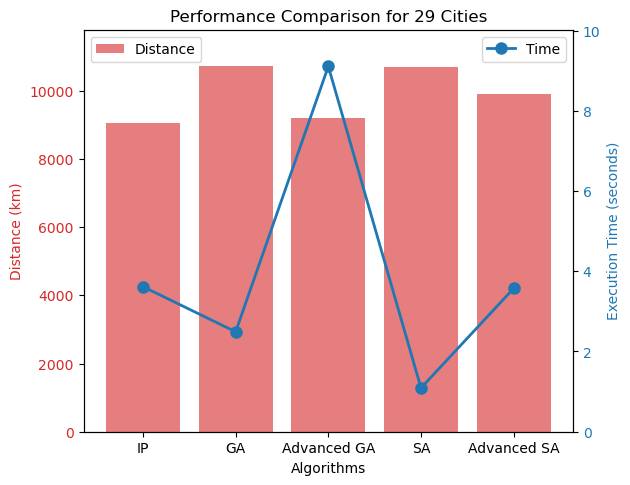

In [34]:
import matplotlib.pyplot as plt

# Data for 29 cities
algorithms = ['IP', 'GA', 'Advanced GA', 'SA', 'Advanced SA']
distances = [ip_distance, ga_distance, ga_adv_distance, sa_distance, sa_adv_distance]
times = [ip_time, ga_time, ga_adv_time, sa_time, sa_adv_time]

fig, ax1 = plt.subplots()

# Plotting the distances
color = 'tab:red'
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Distance (km)', color=color)
ax1.bar(algorithms, distances, color=color, alpha=0.6, label='Distance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, max(distances) * 1.1)

# Creating a second y-axis to plot the times
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Execution Time (seconds)', color=color)
ax2.plot(algorithms, times, color=color, marker='o', linestyle='-', linewidth=2, markersize=8, label='Time')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, max(times) * 1.1)

# Adding legends
fig.tight_layout()  
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Performance Comparison for 29 Cities')
plt.show()


# Graphical presentation of performance for roundtrip of 40 cities of all algorithm

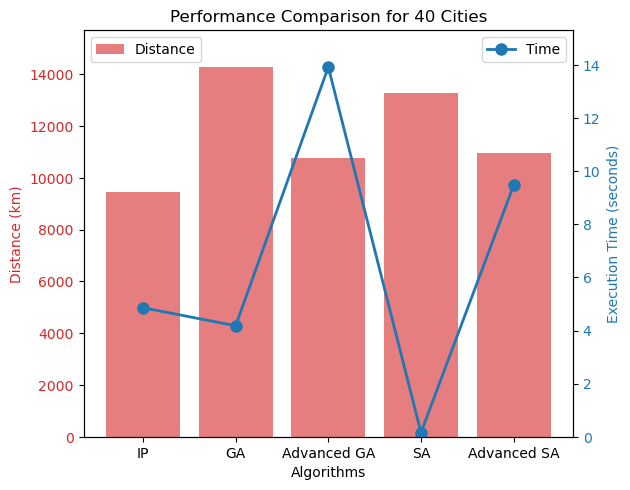

In [35]:
import matplotlib.pyplot as plt

# Data for 40 cities
algorithms = ['IP', 'GA', 'Advanced GA', 'SA', 'Advanced SA']
distances = [ip_distance_40, ga_distance_40, ga_adv_distance_40, sa_distance_40, sa_adv_distance_40]
times = [ip_time_40, ga_time_40, ga_adv_time_40, sa_time_40, sa_adv_time_40]

fig, ax1 = plt.subplots()

# Plotting the distances
color = 'tab:red'
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Distance (km)', color=color)
ax1.bar(algorithms, distances, color=color, alpha=0.6, label='Distance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, max(distances) * 1.1)

# Creating a second y-axis to plot the times
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Execution Time (seconds)', color=color)
ax2.plot(algorithms, times, color=color, marker='o', linestyle='-', linewidth=2, markersize=8, label='Time')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, max(times) * 1.1)

# Adding legends
fig.tight_layout()  
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Performance Comparison for 40 Cities')
plt.show()


# Graphical presentation of performance for roundtrip of 80 cities of all algorithm

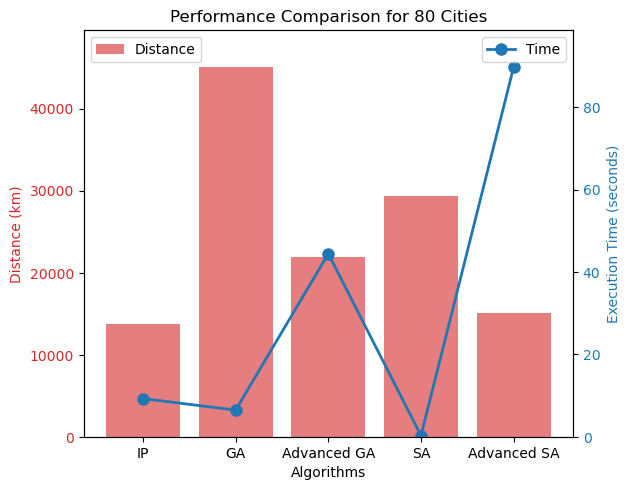

In [36]:
import matplotlib.pyplot as plt

# Data for 80 cities
algorithms = ['IP', 'GA', 'Advanced GA', 'SA', 'Advanced SA']
distances_80 = [ip_distance_80, ga_distance_80, ga_adv_distance_80, sa_distance_80, sa_adv_distance_80]
times_80 = [ip_time_80, ga_time_80, ga_adv_time_80, sa_time_80, sa_adv_time_80]

fig, ax1 = plt.subplots()

# Plotting the distances
color = 'tab:red'
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Distance (km)', color=color)
ax1.bar(algorithms, distances_80, color=color, alpha=0.6, label='Distance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, max(distances_80) * 1.1)

# Creating a second y-axis to plot the times
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Execution Time (seconds)', color=color)
ax2.plot(algorithms, times_80, color=color, marker='o', linestyle='-', linewidth=2, markersize=8, label='Time')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, max(times_80) * 1.1)

# Adding legends
fig.tight_layout()  
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Performance Comparison for 80 Cities')
plt.show()
